In [1]:
import pandas as pd
import numpy as np
import xarray as xr

%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from scipy.integrate import dblquad

In [2]:
datapath="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/Data/ECMWF/ERA5_25kmx3hr/"
target="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/create_ts/outputs/targets/"
p1="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/create_ts/"

In [3]:
dm0=xr.open_dataset(datapath+'/slev_vars/svars_2012.nc')
dm1=xr.open_dataset(datapath+'/slev_vars/totprec_2011_2020.nc')

In [386]:
track=pd.read_csv(p1+'tracks_wp/nwp_20121021.csv',delimiter=r",")
lon1=track['lon'].to_numpy()
lat1=track['lat'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)
pos.shape

(65, 2)

In [387]:
track['time'].info()

track['time'][0]

#fani dm1.time[928:986]
#luban[2222:2291]
#gaja 2505:2559
#ockhi [2654:2709]
#vardah [2722:2772]
#kyant [2352:2419]
#roanu [1096:1137]
#ashoba[1258:1307]
#chapala [2396:2449]
#megh [2460:2508]
#nanauk [1266:1317]
#hudhud 2258:2309
#nilofar 2364:2437
#viyaru 1030:1083
#phailin [2236:2279]
#lehar [2582:2651]
#madi [2704:2765]
#keila 2410:2467

<class 'pandas.core.series.Series'>
RangeIndex: 65 entries, 0 to 64
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
65 non-null     object
dtypes: object(1)
memory usage: 648.0+ bytes


'2012-10-21:12.00.00'

In [388]:
track['time'][64]

'2012-10-29:12.00.00'

In [389]:
dm1.time[2356:2421]

<xarray.DataArray 'time' (time: 65)>
array(['2012-10-21T12:00:00.000000000', '2012-10-21T15:00:00.000000000',
       '2012-10-21T18:00:00.000000000', '2012-10-21T21:00:00.000000000',
       '2012-10-22T00:00:00.000000000', '2012-10-22T03:00:00.000000000',
       '2012-10-22T06:00:00.000000000', '2012-10-22T09:00:00.000000000',
       '2012-10-22T12:00:00.000000000', '2012-10-22T15:00:00.000000000',
       '2012-10-22T18:00:00.000000000', '2012-10-22T21:00:00.000000000',
       '2012-10-23T00:00:00.000000000', '2012-10-23T03:00:00.000000000',
       '2012-10-23T06:00:00.000000000', '2012-10-23T09:00:00.000000000',
       '2012-10-23T12:00:00.000000000', '2012-10-23T15:00:00.000000000',
       '2012-10-23T18:00:00.000000000', '2012-10-23T21:00:00.000000000',
       '2012-10-24T00:00:00.000000000', '2012-10-24T03:00:00.000000000',
       '2012-10-24T06:00:00.000000000', '2012-10-24T09:00:00.000000000',
       '2012-10-24T12:00:00.000000000', '2012-10-24T15:00:00.000000000',
       '2012-10-24T18:00:00.000000000', '2012-10-24T21:00:00.000000000',
       '2012-10-25T00:00:00.000000000', '2012-10-25T03:00:00.000000000',
       '2012-10-25T06:00:00.000000000', '2012-10-25T09:00:00.000000000',
       '2012-10-25T12:00:00.000000000', '2012-10-25T15:00:00.000000000',
       '2012-10-25T18:00:00.000000000', '2012-10-25T21:00:00.000000000',
       '2012-10-26T00:00:00.000000000', '2012-10-26T03:00:00.000000000',
       '2012-10-26T06:00:00.000000000', '2012-10-26T09:00:00.000000000',
       '2012-10-26T12:00:00.000000000', '2012-10-26T15:00:00.000000000',
       '2012-10-26T18:00:00.000000000', '2012-10-26T21:00:00.000000000',
       '2012-10-27T00:00:00.000000000', '2012-10-27T03:00:00.000000000',
       '2012-10-27T06:00:00.000000000', '2012-10-27T09:00:00.000000000',
       '2012-10-27T12:00:00.000000000', '2012-10-27T15:00:00.000000000',
       '2012-10-27T18:00:00.000000000', '2012-10-27T21:00:00.000000000',
       '2012-10-28T00:00:00.000000000', '2012-10-28T03:00:00.000000000',
       '2012-10-28T06:00:00.000000000', '2012-10-28T09:00:00.000000000',
       '2012-10-28T12:00:00.000000000', '2012-10-28T15:00:00.000000000',
       '2012-10-28T18:00:00.000000000', '2012-10-28T21:00:00.000000000',
       '2012-10-29T00:00:00.000000000', '2012-10-29T03:00:00.000000000',
       '2012-10-29T06:00:00.000000000', '2012-10-29T09:00:00.000000000',
       '2012-10-29T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2012-10-21T12:00:00 ... 2012-10-29T12:00:00
Attributes:
    standard_name:  time
    axis:           T

##### cld_ice=dm0.var79[1030:1083]
cld_liq=dm0.var78[1030:1083]
cloud=cld_ice+cld_liq

In [391]:
cld_ice=dm0.var79[2356:2421]
cld_liq=dm0.var78[2356:2421]
cloud=cld_ice+cld_liq

In [392]:
convrr=dm1.var218[2356:2421]
lsrr=dm1.var219[2356:2421]
precip=convrr+lsrr

In [393]:
precip_nan=precip.where(precip>0, other='nan')

In [394]:
tc_irad=np.empty((pos.shape[0],4))
tc_irad[:,0] = pos[:,0]-5
tc_irad[:,1] = pos[:,0]+5
tc_irad[:,2] = pos[:,1]-5
tc_irad[:,3] = pos[:,1]+5

In [395]:
tc_irad

array([[  1.4    ,  11.4    , 130.     , 140.     ],
       [  1.64656,  11.64656, 129.319  , 139.319  ],
       [  1.9    ,  11.9    , 128.8    , 138.8    ],
       [  2.16733,  12.16733, 128.537  , 138.537  ],
       [  2.45   ,  12.45   , 128.35   , 138.35   ],
       [  2.74249,  12.74249, 128.026  , 138.026  ],
       [  3.05   ,  13.05   , 127.65   , 137.65   ],
       [  3.41619,  13.41619, 127.269  , 137.269  ],
       [  3.73333,  13.73333, 126.833  , 136.833  ],
       [  3.8495 ,  13.8495 , 126.383  , 136.383  ],
       [  3.825  ,  13.825  , 125.858  , 135.858  ],
       [  3.67207,  13.67207, 125.361  , 135.361  ],
       [  3.47333,  13.47333, 124.833  , 134.833  ],
       [  3.32631,  13.32631, 124.264  , 134.264  ],
       [  3.275  ,  13.275  , 123.75   , 133.75   ],
       [  3.3693 ,  13.3693 , 123.331  , 133.331  ],
       [  3.55   ,  13.55   , 122.975  , 132.975  ],
       [  3.69799,  13.69799, 122.679  , 132.679  ],
       [  3.925  ,  13.925  , 122.35   , 132.3

In [396]:
ppr=np.zeros((pos.shape[0],40,40))
pp=np.zeros((tc_irad.shape[0],))
ppm=np.zeros((tc_irad.shape[0],))
ppmaskcloud = np.zeros((pos.shape[0],40,40))

In [397]:
for it in range(tc_irad.shape[0]):
    latn, lats, lone, lonw = tc_irad[it,:]
    ppr[it,:,:]=precip[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:40,0:40]
    ppmaskcloud[it,:,:]=cloud[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:40,0:40]
    ppm[it]=np.nanmax(ppr[it,:,:])

In [398]:
def preproc_integration(array_precip=None,array_cloud=None,cloudmaskvalue=None):
    pprm = array_precip.copy().flatten()
    pprm[array_cloud.copy().flatten()<cloudmaskvalue] = 0
    return pprm.reshape(array_precip.shape)

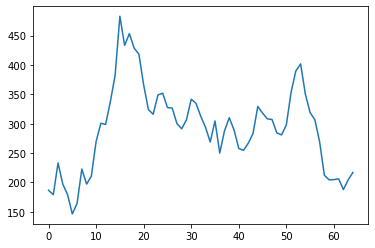

In [399]:
cloudmaskvalue = np.nanpercentile(ppmaskcloud[...].flatten(),10)
masked_precip = [preproc_integration(ppr[i,...],ppmaskcloud[i,...],cloudmaskvalue) for i in range(ppr.shape[0])]
p=(np.trapz(np.trapz(np.asarray(masked_precip),dx=25,axis=1),dx=25,axis=1))
plt.plot(np.trapz(np.trapz(np.asarray(masked_precip),dx=25,axis=1),dx=25,axis=1))
plt.show()

In [400]:
p

array([186.72877923, 179.15284261, 233.10670629, 197.01657817,
       179.25804481, 146.41752467, 164.29344192, 222.89933637,
       197.19362259, 210.55743098, 269.62570846, 300.69326982,
       298.72601852, 337.52759919, 382.61989132, 482.93754458,
       433.33381414, 453.35145667, 428.76373976, 418.21656749,
       366.05063826, 323.97625968, 316.05809927, 348.93292934,
       351.90321505, 327.61914656, 326.53005794, 300.21479353,
       291.31736606, 306.69869855, 341.70804545, 334.68613401,
       312.78857961, 294.06463727, 268.7796019 , 304.72857878,
       250.03494695, 287.91695833, 310.18672511, 289.47340325,
       257.92581961, 254.67794389, 266.81074873, 283.315368  ,
       329.44533974, 318.08344647, 308.29034746, 307.09262937,
       284.41211209, 280.89243919, 297.80892655, 353.50836813,
       389.7658363 , 401.81983262, 350.40911287, 318.92942265,
       306.77881092, 269.14712042, 212.23334596, 204.38252017,
       204.80768755, 206.05813712, 187.89324909, 204.38

In [401]:
ppm=ppm*3600 #to convert to mm/hr

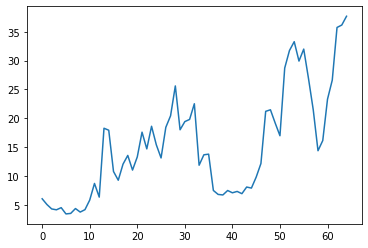

In [402]:
plt.plot(ppm)
#plt.plot(testm)
plt.show()

In [405]:
p.shape

(65,)

In [403]:
df = pd.DataFrame(data=ppm, columns=["Prec_max"])
df1 = pd.DataFrame(data=p, columns=["Prec_Intg"])

In [406]:
df.to_csv(target+'2012_pratemax_nwp_sontinh.csv')
df1.to_csv(target+'2012_integrated_prate_nwp_sontinh.csv')

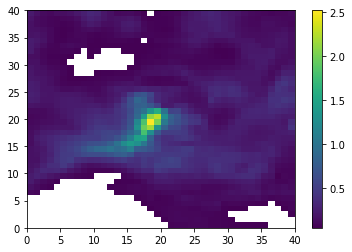

In [24]:
plt.pcolormesh(np.ma.masked_less(ppmaskcloud[15,...],0.05))
plt.colorbar()
plt.show()

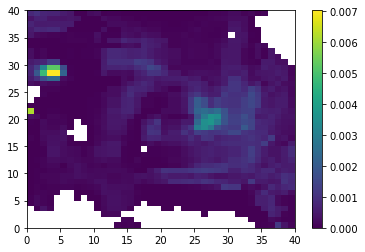

In [31]:
plt.pcolormesh(np.ma.masked_where(ppmaskcloud[15,...]<0.062,ppr[15,...]))
plt.colorbar()
plt.show()

In [ ]:
cloudmaskvalue = np.nanpercentile(ppmaskcloud[...].flatten(),10)
testm = [np.mean(ppr[i,...][~np.ma.masked_where(ppmaskcloud[i,...]<cloudmaskvalue,ppr[i,...]).mask]) for i in range(ppr.shape[0])]

In [ ]:
plt.plot(np.trapz(np.trapz(ppr,dx=25,axis=1),dx=25,axis=1))
plt.plot(np.trapz(np.trapz(np.asarray(masked_precip),dx=25,axis=1),dx=25,axis=1))
plt.show()

In [ ]:
pp=pp*86400 #to convert to mm/day

In [ ]:
np.nanpercentile(cloud[15,280:360,240:500],10)

In [ ]:
cloud[15,280:360,240:500].plot()

In [ ]:
import matplotlib.pyplot as plt
plt.pcolormesh(np.ma.masked_less(precip[15,280:360,240:500],0))
plt.show()

In [ ]:
plt.pcolormesh(np.ma.masked_less(cloud[15,280:360,240:500],0.006958),cmap='magma')
plt.colorbar()
plt.show()